# Exploratory Data Analysis - 3

## Imports

In [740]:
import numpy as np
import pandas as pd

## Load DataSets

In [741]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic = pd.read_csv('dictionary.csv')

In [742]:
# Summer Games

summer.head(3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [743]:
# Winter Games

winter.head(3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze


In [744]:
# Economics

dic.head(3)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


## Merge 'summer' and 'winter' Datasets

In [745]:
olympics = pd.concat([summer, winter], axis = 0, keys = ['Summer', 'Winter'], names = ['Edition']).reset_index().drop('level_1', axis = 1)
olympics.head(3)

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


## Join the 'olympics' DataFrame with 'dic' via Code

In [746]:
olympics = olympics.merge(dic.iloc[:, :2], how = 'left', left_on = 'Country', right_on = 'Code').drop(columns = ['Code'])
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


## Rename Columns

In [747]:
olympics.rename(columns = {'Country_x': 'Code', 'Country_y': 'Country'}, inplace = True) # rename columns
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [748]:
# White Spaces

dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [749]:
# Remane 'GDP per Capita' to simply 'GDP'

dic.rename(columns = {'GDP per Capita': 'GDP'}, inplace = True)
dic.head(3)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


## Data Cleaning (Missing Values)

In [750]:
# Check for missing values

olympics.info() # Lots of missing values on Country

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [751]:
# Check Null values (NaN)

olympics.loc[olympics['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [752]:
# Missing Country Index

missing_index = olympics.loc[olympics['Country'].isnull()].index
missing_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [753]:
# Count Missing Values

olympics.loc[olympics['Country'].isnull()]['Code'].value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [754]:
# Old Countries

old_countries = olympics.loc[olympics['Country'].isnull(), :]['Code'].value_counts().index
old_countries

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [755]:
# Map to a Series 

mapper = pd.Series(index = old_countries, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [756]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [757]:
# Map Assignments

olympics.loc[missing_index, 'Code'].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [758]:
# Fill Missing Values (Mapped)

olympics['Country'].fillna(olympics['Code'].map(mapper), inplace = True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [759]:
# Check if filled

olympics.iloc[missing_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [760]:
# Check remaining NaN Values

olympics[olympics['Code'].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [761]:
# Drop the missing values

olympics.dropna(axis = 0, inplace = True)
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


## Check Number of Unique Values

In [762]:
# Check number of unique values

olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

## Change Dtype of 'Medal' to category

In [763]:
olympics['Medal'] = olympics['Medal'].astype('category')
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 3.1+ MB


In [764]:
# Check Medal Tally

olympics['Medal'].sort_values()

36934    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [765]:
# Assign orders

olympics['Medal'].cat.set_categories(['Gold','Silver','Bronze'], ordered = True, inplace = True)

In [766]:
# Sort again

olympics.sort_values(by = 'Medal')[['Medal', 'Country']]

,Medal,Country
0,Gold,Hungary
11063,Gold,Soviet Union
11064,Gold,Soviet Union
26048,Gold,Canada
26045,Gold,Russia
...,...,...
25814,Bronze,United States
25815,Bronze,United States
25816,Bronze,United States
11299,Bronze,Unified Team of Germany


## What country is the most successful in terms of medal count?

In [767]:
olympics['Country'].value_counts()

United States      5238
Soviet Union       2489
United Kingdom     1799
Germany            1665
France             1548
                   ... 
Botswana              1
Virgin Islands*       1
Cote d'Ivoire         1
Togo                  1
Guatemala             1
Name: Country, Length: 145, dtype: int64

## What are the top 10 countries in terms of medal count?

In [768]:
olympics['Country'].value_counts().head(10)

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

## Preview on Data Visualization

In [769]:
# Matplotlib Library

import matplotlib.pyplot as plt

Text(0, 0.5, 'Medals')

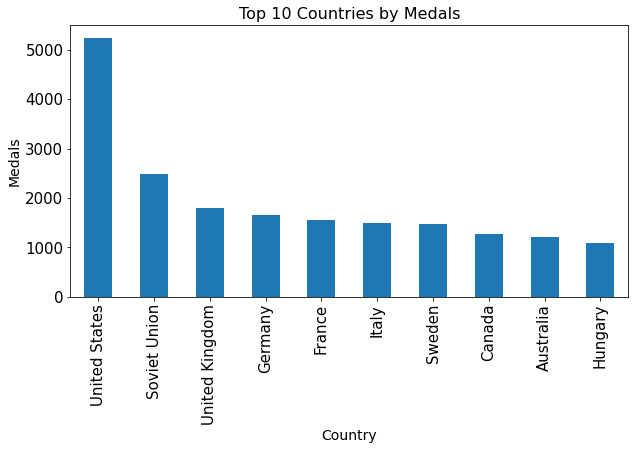

In [770]:
# Bar Graph (Top 10)

top_10 = olympics['Country'].value_counts().head(10)
top_10.plot(kind = 'bar', fontsize = 15, figsize = (10,5))

plt.title('Top 10 Countries by Medals', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Medals', fontsize = 14)

## Do GDP, Population and Politics Matter?

In [771]:
# Cross TAb

medals_per_country = pd.crosstab(index = olympics['Country'], columns = olympics['Medal'], margins = True, margins_name = 'Total')
medals_per_country

Medal,Gold,Silver,Bronze,Total
Country,,,,
Afghanistan,0,0,2,2
Algeria,5,2,8,15
Argentina,69,99,91,259
Armenia,1,2,8,11
Australasia,20,4,5,29
...,...,...,...,...
West Indies Federation,0,0,5,5
Yugoslavia,143,180,119,442
Zambia,0,1,1,2


In [772]:
# Sort per Category Top 50

medals_per_country = medals_per_country[['Total','Gold','Silver','Bronze']].sort_values(by = ['Total','Gold','Silver','Bronze'], ascending = False)
medals_per_country.head(50)

Medal,Total,Gold,Silver,Bronze
Country,,,,
Total,36931,12405,12238,12288
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369


In [773]:
# Merge with GDP

medals_per_country = medals_per_country.merge(dic, how = "left", left_index = True, right_on = "Country").drop(columns = ["Code"]).set_index("Country")
medals_per_country.head(10)

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
Total,36931,12405,12238,12288,NaN,NaN
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
Italy,1488,534,473,481,60802085.0,29957.804315
Sweden,1477,476,496,505,9798871.0,50579.673649
Canada,1274,470,435,369,35851774.0,43248.529909


In [774]:
# Do participation accounts for most medals?

olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [778]:
# Create Games column (because 1 City hosts multiple Olympic Events)

olympics['Games'] = olympics.apply(lambda x: str(x['Year']) + " " + x['City'], axis = 1)
olympics.head(5)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens


In [780]:
# Count Number of Medals per Game

olympics['Games'].value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1912 Stockholm                  885
1956 Melbourne / Stockholm      885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [783]:
# Number of Participations per Country

# olympics.groupby('Country').apply(lambda x: x['Games'].nunique())

medals_per_country['Total_Games'] = olympics.groupby('Country').apply(lambda x: x['Games'].nunique())
medals_per_country.head(50).sort_values(by = 'Total_Games', ascending = False)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,3.214188e+08,56115.718426,48.0
France,1548,444,526,578,6.680838e+07,36205.568102,47.0
Sweden,1477,476,496,505,9.798871e+06,50579.673649,47.0
Canada,1274,470,435,369,3.585177e+07,43248.529909,47.0
Switzerland,665,151,244,270,8.286976e+06,80945.079219,46.0
Finland,890,190,267,433,5.482013e+06,42311.036231,46.0
Austria,426,100,179,147,8.611088e+06,43774.985174,46.0
Norway,1011,368,371,272,5.195921e+06,74400.369777,44.0
Italy,1488,534,473,481,6.080208e+07,29957.804315,43.0


In [788]:
# Using Rank

medals_per_country.rank(ascending = False).sort_values(by = 'Total_Games').head(10)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,2.0,2.0,2.0,2.0,3.0,7.0,1.0
France,6.0,9.0,5.0,5.0,19.0,22.0,3.0
Sweden,8.0,7.0,7.0,7.0,71.0,10.0,3.0
Canada,9.0,8.0,9.0,13.0,35.0,15.0,3.0
Switzerland,19.0,23.0,19.0,19.0,78.0,2.0,6.0
Finland,16.0,19.0,18.0,10.0,88.0,17.0,6.0
Austria,29.0,29.0,28.0,28.0,75.0,14.0,6.0
Norway,13.0,12.0,11.0,18.0,90.0,3.0,8.0
Italy,7.0,6.0,8.0,8.0,21.0,25.0,9.0
